<a href="https://colab.research.google.com/github/SBANTHIYA/Data-Science-and-Analytics-Portfolio/blob/master/Python%3A%20Machine%20Learning%20and%20Deep%20Learning/Deep_Learning_with_Python_Keras_and_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 : Deep Learning
# By Swati Banthiya

# CAP 5768 - Data Science - Dr. Marques - Fall 2020


In this assignment I have attempted to answer all questions as per the guide shared with me on Google Colab. I have attempted the Bonus question and tried to provide explanations of why I did choose a particular parameter based on hints found on blogs and data science tutorials.

I have edited the original Colab File provided by the Professor, leaving all essential explanations and instructions for my future reference. The code for the answers are clearly labelled.

### Goals 

- To learn how to use perform classification using neural networks.
- To appreciate the differences in neural network architectures for the same task -- image classification -- and dataset (MNIST, CIFAR-10).
- To learn how to implement and evaluate deep learning models in Python, using Keras and TensorFlow. 

### Imports


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from tensorflow.keras import layers

from matplotlib import pyplot as plt

import numpy as np

## PART 1: Digit classification using MNIST

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

http://yann.lecun.com/exdb/mnist/


### 1a. Shallow neural network architecture

Based on https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

#### Load and prepare the data

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

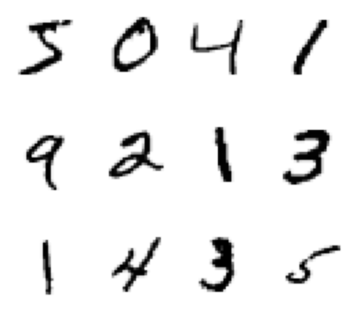

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

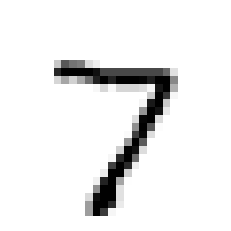

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Build your first neural network model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

#### Configure model

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(lr=0.01), 
    metrics=['accuracy']
)


#### Train!

In [ ]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.1200 - val_loss: 0.0922 - val_accuracy: 0.1280
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.1369 - val_loss: 0.0915 - val_accuracy: 0.1439
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.1529 - val_loss: 0.0909 - val_accuracy: 0.1609
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1684 - val_loss: 0.0904 - val_accuracy: 0.1780
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.1874 - val_loss: 0.0899 - val_accuracy: 0.1956
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.2056 - val_loss: 0.0895 - val_accuracy: 0.2167
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.2213 - val_loss: 0.0892 - val_accuracy: 0.2309

#### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


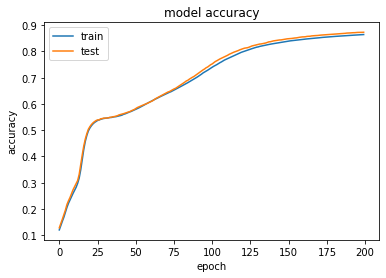

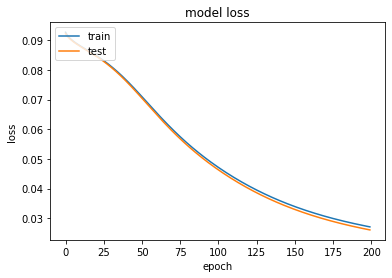

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0260 - accuracy: 0.8731


[0.026037929579615593, 0.8730999827384949]

### 1.1 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, and learning rate, for example:
```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
```

2. Write code to train the same network with different options for `batch_size` and number of epochs.

3. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | SGD | 0.01 | `mean_squared_error` | 128 | 200 | 0.8660 | Comparable to Naive Bayes |
| Variation #1 | ADAM | (default) | `categorical_crossentropy` | 128 | 200 | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | `categorical_crossentropy` | 128 | 500 | ... | Improved accuracy thanks to Y |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 500 | ... | Improved accuracy thanks to Z |

4. Write a short paragraph summarizing what you have learned from this exercise. 

# ANSWER 1.1

The approach I will be implementing to answer this question is varying one parameter at a time and recording whether the accuracy is improving or not. The best of the variations are then combined to provide the combinations in the summary table.

In [ ]:
# Step 1: Define functions

def define_model(loss,optimizer,metrics):
    model = Sequential()
    model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss= loss, optimizer= optimizer, metrics=metrics)
    return model


In [ ]:
def evaluate_model(batch_size,epochs):
    history = model.fit(X_training,y_training,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(X_validation, y_validation))
    _,accscore=model.evaluate(X_validation, y_validation,verbose=0)
		# stores scores
    return accscore
    

In [ ]:



baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
baseline_epochs = 200

# running the functions for baseline model

define_model(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
baseline_accuracy=evaluate_model(batch_size=baseline_batchsize, epochs=baseline_epochs)





Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.8648 - val_loss: 0.0259 - val_accuracy: 0.8736
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.8651 - val_loss: 0.0258 - val_accuracy: 0.8736
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.8654 - val_loss: 0.0257 - val_accuracy: 0.8739
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.8656 - val_loss: 0.0256 - val_accuracy: 0.8742
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.8661 - val_loss: 0.0255 - val_accuracy: 0.8745
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.8663 - val_loss: 0.0255 - val_accuracy: 0.8749
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.8668 - val_loss: 0.0254 - val_accuracy: 0.8752

**Variation #1**

Here, I attempted to change **ONLY** the **loss function type**. As per keras, the "purpose of loss functions is to compute the quantity that a model should seek to minimize during training."

Referring to the different kinds of losses from https://keras.io/api/losses/, I chose to go with categorical crossentropy because this loss function resulted in better accuracy as suggested by a blog - https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/

All my variation #1 trial runs involve changes in loss fucntions only and the best change for accuracy is recorded in the Summary table.

In [ ]:
#Variation#1 model - Change in loss function only as compared to baseline

var1_loss='categorical_crossentropy'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
baseline_epochs = 200

# running the functions for variation#1 model - baseline values remain the same

define_model(loss=var1_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
var1_accuracy=evaluate_model(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.8942 - val_loss: 0.0172 - val_accuracy: 0.9030
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.8941 - val_loss: 0.0171 - val_accuracy: 0.9030
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.8943 - val_loss: 0.0171 - val_accuracy: 0.9031
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.8943 - val_loss: 0.0171 - val_accuracy: 0.9031
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.8943 - val_loss: 0.0171 - val_accuracy: 0.9031
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.8945 - val_loss: 0.0171 - val_accuracy: 0.9031
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.8943 - val_loss: 0.0171 - val_accuracy: 0.9031

**Variation #2**

Here, I attempted to change **ONLY** the **optimizer** using the Baseline. As per Algorithmia - https://algorithmia.com/blog/introduction-to-optimizers, "tie together the loss function and model parameters by updating the model in response to the output of the loss function. In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction."

Referring to the different kinds of losses from https://keras.io/api/optimizers/, I chose to go with Adam as my change to optimizer from Baseline model. The reason I did so was as per research by Vadim Smolyakov on https://towardsdatascience.com/neural-network-optimization-algorithms-1a44c282f61d which concludes that "SGD with Nesterov Momentum and Adam produce the best results when training a simple CNN on MNIST data in TensorFlow." 

All comparisions of variation #2 will be made to the Baseline model.

In [ ]:
#Variation#2 model - Change in optimizer only as compared to baseline

baseline_loss='mean_squared_error'
lr=0.01
var2_optimizer= keras.optimizers.Adam(lr)
baseline_batchsize=128
baseline_epochs = 200

# running the functions for variation#2 model - baseline values remain the same

define_model(loss=baseline_loss, optimizer=var2_optimizer, metrics=['accuracy'])
var2_accuracy=evaluate_model(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9047 - val_loss: 0.0147 - val_accuracy: 0.9103
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9047 - val_loss: 0.0147 - val_accuracy: 0.9103
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9047 - val_loss: 0.0147 - val_accuracy: 0.9104
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9046 - val_loss: 0.0147 - val_accuracy: 0.9104
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9048 - val_loss: 0.0146 - val_accuracy: 0.9105
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9048 - val_loss: 0.0146 - val_accuracy: 0.9105
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9049 - val_loss: 0.0146 - val_accuracy: 0.9106

**Variation #3**

Here, I attempted to change **ONLY** the **learning rate** using the Baseline as the base. As per Vadim Smolyakov on https://towardsdatascience.com/neural-network-optimization-algorithms-1a44c282f61d, "The learning rate is a function of iteration k and is a single most important hyper-parameter. A learning rate that is too high (e.g. > 0.1) can lead to parameter updates that miss the optimum value, a learning rate that is too low (e.g. < 1e-5) will result in unnecessarily long training time."

Also, it has been suggested by https://www.freecodecamp.org/news/how-to-pick-the-best-learning-rate-for-your-machine-learning-project-9c28865039a8/ that there is "no learning rate that works for all optimizers." The experiment by the author David Mack suggested that "Learning rates 0.0005, 0.001, 0.00146 performed best — these also performed best in the first experiment." This is with the Adam model however. Our baseline uses SGD. This point is noted for Variation #4- my final attempt.

All comparisions of variation #3 will be made to the Baseline model.

In [ ]:
#Variation#3 model - Change in learning rate only as compared to baseline

baseline_loss='mean_squared_error'
lr3=0.0005
var3_optimizer= SGD(lr3)
baseline_batchsize=128
baseline_epochs = 200

# running the functions for variation#3 model - baseline values remain the same

define_model(loss=baseline_loss, optimizer=var3_optimizer, metrics=['accuracy'])
var3_accuracy=evaluate_model(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9121 - val_loss: 0.0134 - val_accuracy: 0.9165
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9120 - val_loss: 0.0134 - val_accuracy: 0.9166
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9121 - val_loss: 0.0134 - val_accuracy: 0.9164
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9121 - val_loss: 0.0134 - val_accuracy: 0.9165
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9122 - val_loss: 0.0134 - val_accuracy: 0.9165
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9122 - val_loss: 0.0134 - val_accuracy: 0.9165
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9122 - val_loss: 0.0134 - val_accuracy: 0.9166

**Variation #4**

Here, I attempted to change **ONLY** the **baseline epochs**. Based on the graph above and Professor's hint, increasing the number of epochs could improve accuracy. Hence, I increased the number of epochs to 250 in this attempt, keeping all other values same.

All comparisions of variation #4 will be made to the Baseline model.

In [ ]:
#Variation#4 model - Change in baseline epochs only as compared to baseline

baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
var4_epochs = 250

# running the functions for variation#4 model - baseline values remain the same

define_model(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
var4_accuracy=evaluate_model(batch_size=baseline_batchsize, epochs=var4_epochs)

Epoch 1/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9171 - val_loss: 0.0126 - val_accuracy: 0.9209
Epoch 2/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9171 - val_loss: 0.0126 - val_accuracy: 0.9209
Epoch 3/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9171 - val_loss: 0.0126 - val_accuracy: 0.9209
Epoch 4/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9171 - val_loss: 0.0126 - val_accuracy: 0.9209
Epoch 5/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9172 - val_loss: 0.0126 - val_accuracy: 0.9210
Epoch 6/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9172 - val_loss: 0.0126 - val_accuracy: 0.9211
Epoch 7/250
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9172 - val_loss: 0.0126 - val_accuracy: 0.9211

**Variation #5**

Here, I attempted to change **ONLY** the **batchsize**. Based on a research publication chart on varying batch size https://www.researchgate.net/figure/Performance-on-MNIST-for-varying-batch-size-as-a-function-of-noise-level-Higher-batch_fig3_317241165, the higher the batch size, the better the accuracy. Hence, I increased the batch size to 256 in this attempt.

All comparisions of variation #5 will be made to the Baseline model.

In [ ]:
#Variation#5 model - Change in batchsize only as compared to baseline

baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
var5_batchsize=256
baseline_epochs = 200

# running the functions for variation#5 model - baseline values remain the same

define_model(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
var5_accuracy=evaluate_model(batch_size=var5_batchsize, epochs=baseline_epochs)

Epoch 1/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0124 - accuracy: 0.9224 - val_loss: 0.0118 - val_accuracy: 0.9253
Epoch 2/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9224 - val_loss: 0.0118 - val_accuracy: 0.9253
Epoch 3/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9224 - val_loss: 0.0118 - val_accuracy: 0.9253
Epoch 4/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9224 - val_loss: 0.0118 - val_accuracy: 0.9253
Epoch 5/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9224 - val_loss: 0.0118 - val_accuracy: 0.9253
Epoch 6/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9224 - val_loss: 0.0118 - val_accuracy: 0.9253
Epoch 7/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.9225 - val_loss: 0.0118 - val_accuracy: 0.9253

In [ ]:
import pandas as pd

# var#1 - change in loss only
# var#2 - change in optimizer only
# var#3 - change in learning rate only
# var#4 - change in epoch only
# var#5 - change in batch size only

def summarize():
    data = {'method' : ['Baseline','Variation #1','Variation #2', 'Variation #3','Variation #4','Variation #5'],
            'loss': [baseline_loss, var1_loss, baseline_loss, baseline_loss, baseline_loss, baseline_loss],
            'learning rate' : [lr,lr,lr,lr3,lr,lr],
            'optimizer' : ['SGD','SGD','Adam','SGD','SGD','SGD'],
            'batch size' : [baseline_batchsize, baseline_batchsize, baseline_batchsize, baseline_batchsize, baseline_batchsize, var5_batchsize],
            'epochs' : [baseline_epochs, baseline_epochs, baseline_epochs, baseline_epochs, var4_epochs, baseline_epochs],
            'Validation accuracy' : [baseline_accuracy,var1_accuracy,var2_accuracy,var3_accuracy,var4_accuracy,var5_accuracy],
            'Remarks' : ['Comparable to Naives Bayes','Improved accuracy thanks to baseline_loss','Improved accuracy thanks to Adam optimizer','Improved accuracy thanks to decrease in learning rate', 'Improved accuracy thanks to increase in epoch', 'Improved accuracy thanks to increase in batchsize']
           }
    df = pd.DataFrame(data, columns= ['method','optimizer','learning rate','loss','batch size', 'epochs','Validation accuracy', 'Remarks'])
    
    display(df)

summarize()

,method,optimizer,learning rate,loss,batch size,epochs,Validation accuracy,Remarks
0,Baseline,SGD,0.0100,mean_squared_error,128,200,0.9029,Comparable to Naives Bayes
1,Variation #1,SGD,0.0100,categorical_crossentropy,128,200,0.9104,Improved accuracy thanks to baseline_loss
2,Variation #2,Adam,0.0100,mean_squared_error,128,200,0.9165,Improved accuracy thanks to Adam optimizer
3,Variation #3,SGD,0.0005,mean_squared_error,128,200,0.9209,Improved accuracy thanks to decrease in learni...
4,Variation #4,SGD,0.0100,mean_squared_error,128,250,0.9252,Improved accuracy thanks to increase in epoch
5,Variation #5,SGD,0.0100,mean_squared_error,256,200,0.9271,Improved accuracy thanks to increase in batchsize


#Summarizing 1.1

From the above table it can be observed that increasing epoch, decreasing learning rate and increasing batch-size have had a positive effect on the validation accuracy of the MNIST model. This was along the lines of the hints found on various blogs and data science sites quoted above.

The Adam optimizer performed better than the SGD with all other parameters remaining the same in the baseline. Also,the categorical_crossentropy baseline loss function performed better than the mean squared error loss function with all other parameters remaining the same.



### 1b. Convolutional neural network architecture

Based on https://keras.io/examples/vision/mnist_convnet/ 

In [ ]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

#### Configure model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

#### Prepare the data
The CNN does not expect the images to be flattened.

In [ ]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Train!


In [ ]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3415 - accuracy: 0.8968 - val_loss: 0.0810 - val_accuracy: 0.9757
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1023 - accuracy: 0.9685 - val_loss: 0.0525 - val_accuracy: 0.9835
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0793 - accuracy: 0.9758 - val_loss: 0.0430 - val_accuracy: 0.9860
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0391 - val_accuracy: 0.9877
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 0.0369 - val_accuracy: 0.9870
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 

#### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


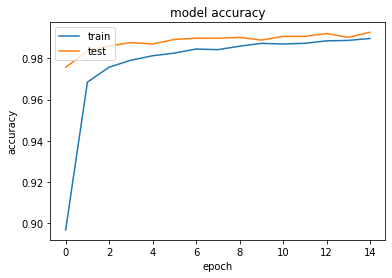

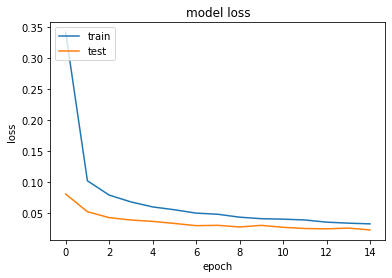

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0232 - accuracy: 0.9927


[0.02318471483886242, 0.9926999807357788]

### 1.2 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, learning rate,  `batch_size` and number of epochs.

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise. 

# ANSWER 1.2

The approach I will be implementing to answer this question is varying one parameter at a time and recording whether the accuracy is improving or not. The best of the variations are then combined to provide the combinations in the summary table.

In [ ]:
# Step 1: Define functions

def define_model_cnn(loss,optimizer,metrics):
    model_cnn = keras.Sequential([keras.Input(shape=input_shape),layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
    ])
    model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_cnn


In [ ]:
def evaluate_model_cnn(batch_size,epochs):
  history = model_cnn.fit(X_train_cnn,  y_training,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(X_valid_cnn, y_validation))
  _,accscore=model_cnn.evaluate(X_valid_cnn, y_validation)
	# stores scores
  return accscore
    

In [ ]:


baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
baseline_epochs = 15

# running the functions for baseline model

define_model_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
baseline_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)



Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0424 - val_accuracy: 0.9914
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.0407 - val_accuracy: 0.9925
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0410 - val_accuracy: 0.9923
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0416 - val_accuracy: 0.9924
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.0394 - val_accuracy: 0.9931
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0407 - val_accuracy: 0.9921
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0390 - val_accuracy: 0.9926
Epoch 

**Variation #1**

Here, I attempted to change **ONLY** the **loss function type**. As per keras, the "purpose of loss functions is to compute the quantity that a model should seek to minimize during training."

Referring to the different kinds of losses from https://keras.io/api/losses/, I chose to go with categorical crossentropy because this loss function resulted in better accuracy for MNIST dataset as suggested by a blog - https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/

All my variation #1 trial runs involve changes in loss fucntions only and the best change for accuracy is recorded in the Summary table.

In [ ]:
#Variation#1 model - Change in loss function only as compared to baseline

var1_loss='categorical_crossentropy'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
baseline_epochs = 15

# running the functions for variation#1 model - baseline values remain the same

define_model_cnn(loss=var1_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
var1_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0252 - val_accuracy: 0.9924
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0237 - val_accuracy: 0.9931
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0187 - accuracy: 0.9932 - val_loss: 0.0245 - val_accuracy: 0.9925
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0260 - val_accuracy: 0.9922
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0245 - val_accuracy: 0.9927
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0262 - val_accuracy: 0.9930
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


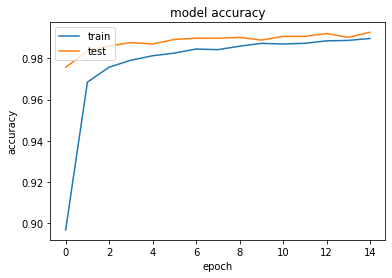

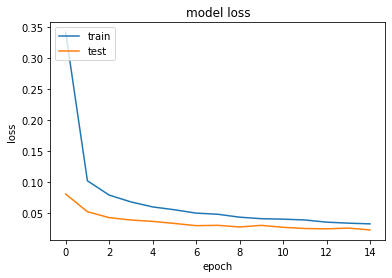

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Variation #2**

Here, I attempted to change **ONLY** the **optimizer** using the Baseline. As per Algorithmia - https://algorithmia.com/blog/introduction-to-optimizers, "tie together the loss function and model parameters by updating the model in response to the output of the loss function. In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction."

Referring to the different kinds of losses from https://keras.io/api/optimizers/, I chose to go with Adam as my change to optimizer from Baseline model. The reason I did so was as per research by Vadim Smolyakov on https://towardsdatascience.com/neural-network-optimization-algorithms-1a44c282f61d which concludes that "SGD with Nesterov Momentum and Adam produce the best results when training a simple CNN on MNIST data in TensorFlow." 

All comparisions of variation #2 will be made to the Baseline model.

In [ ]:
#Variation#2 model - Change in optimizer only as compared to baseline

baseline_loss='mean_squared_error'
lr=0.01
var2_optimizer= keras.optimizers.Adam(lr)
baseline_batchsize=128
baseline_epochs = 15

# running the functions for variation#2 model - baseline values remain the same

define_model_cnn(loss=baseline_loss, optimizer=var2_optimizer, metrics=['accuracy'])
var2_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0279 - val_accuracy: 0.9922
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0251 - val_accuracy: 0.9933
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0253 - val_accuracy: 0.9925
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0266 - val_accuracy: 0.9926
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0261 - val_accuracy: 0.9928
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0263 - val_accuracy: 0.9926
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0252 - val_accuracy: 0.9929
Epoch 

**Variation #3**

Here, I attempted to change **ONLY** the **learning rate** using the Baseline as the base. As per Vadim Smolyakov on https://towardsdatascience.com/neural-network-optimization-algorithms-1a44c282f61d, "The learning rate is a function of iteration k and is a single most important hyper-parameter. A learning rate that is too high (e.g. > 0.1) can lead to parameter updates that miss the optimum value, a learning rate that is too low (e.g. < 1e-5) will result in unnecessarily long training time."

Also, it has been suggested by https://www.freecodecamp.org/news/how-to-pick-the-best-learning-rate-for-your-machine-learning-project-9c28865039a8/ that there is "no learning rate that works for all optimizers." The experiment by the author David Mack suggested that "Learning rates 0.0005, 0.001, 0.00146 performed best — these also performed best in the first experiment." This is with the Adam model however. Our baseline uses SGD. This point is noted for Variation #4- my final attempt.

All comparisions of variation #3 will be made to the Baseline model.

In [ ]:
#Variation#3 model - Change in learning rate only as compared to baseline

baseline_loss='mean_squared_error'
lr3=0.0005
var3_optimizer= SGD(lr3)
baseline_batchsize=128
baseline_epochs = 15

# running the functions for variation#3 model - baseline values remain the same

define_model_cnn(loss=baseline_loss, optimizer=var3_optimizer, metrics=['accuracy'])
var3_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0258 - val_accuracy: 0.9935
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0286 - val_accuracy: 0.9923
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0285 - val_accuracy: 0.9925
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.0312 - val_accuracy: 0.9924
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0290 - val_accuracy: 0.9929
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0119 - accuracy: 0.9955 - val_loss: 0.0289 - val_accuracy: 0.9926
Epoch 

**Variation #4**

Here, I attempted to change **ONLY** the **baseline epochs**. Based on the graph above and Professor's hint, increasing the number of epochs could improve accuracy. Hence, I increased the number of epochs from 15 to 30 in this attempt, keeping all other values same.

All comparisions of variation #4 will be made to the Baseline model.

In [ ]:
#Variation#4 model - Change in baseline epochs only as compared to baseline

baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
var4_epochs = 30

# running the functions for variation#4 model - baseline values remain the same

define_model_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
var4_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=var4_epochs)

Epoch 1/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0312 - val_accuracy: 0.9927
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0272 - val_accuracy: 0.9932
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0341 - val_accuracy: 0.9922
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0297 - val_accuracy: 0.9932
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0110 - accuracy: 0.9960 - val_loss: 0.0294 - val_accuracy: 0.9926
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0095 - accuracy: 0.9966 - val_loss: 0.0272 - val_accuracy: 0.9932
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0269 - val_accuracy: 0.9934
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


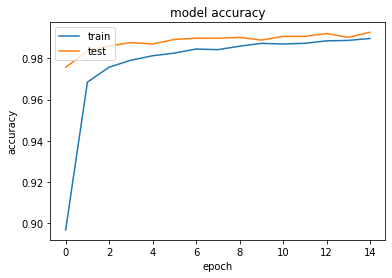

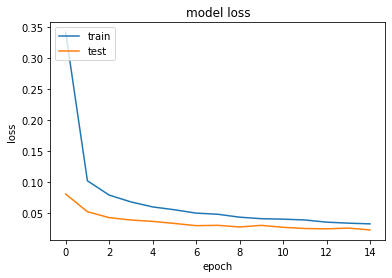

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Variation #5**

Here, I attempted to change **ONLY** the **batchsize**. Based on a research publication chart on varying batch size https://www.researchgate.net/figure/Performance-on-MNIST-for-varying-batch-size-as-a-function-of-noise-level-Higher-batch_fig3_317241165, the higher the batch size, the better the accuracy. Hence, I increased the batch size to 256 in this attempt.

All comparisions of variation #5 will be made to the Baseline model.

In [ ]:
#Variation#5 model - Change in batchsize only as compared to baseline

baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
var5_batchsize=256
baseline_epochs = 15

# running the functions for variation#5 model - baseline values remain the same

define_model_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
var5_accuracy=evaluate_model_cnn(batch_size=var5_batchsize, epochs=baseline_epochs)

Epoch 1/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0336 - val_accuracy: 0.9926
Epoch 2/15
235/235 [==============================] - 2s 6ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0302 - val_accuracy: 0.9935
Epoch 3/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0299 - val_accuracy: 0.9932
Epoch 4/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0066 - accuracy: 0.9974 - val_loss: 0.0306 - val_accuracy: 0.9930
Epoch 5/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 0.9975 - val_loss: 0.0291 - val_accuracy: 0.9936
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0281 - val_accuracy: 0.9939
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0307 - val_accuracy: 0.9934
Epoch 

In [ ]:
import pandas as pd

# var#1 - change in loss only
# var#2 - change in optimizer only
# var#3 - change in learning rate only
# var#4 - change in epoch only
# var#5 - change in batch size only


def summarize():
    data = {'method' : ['Baseline','Variation #1', 'Variation #2', 'Variation #3','Variation #4','Variation #5'],
            'loss': [baseline_loss,var1_loss,baseline_loss, baseline_loss,baseline_loss,baseline_loss],
            'learning rate' : [lr,lr,lr,lr3,lr,lr],
            'optimizer' : ['SGD','SGD','Adam','SGD','SGD','SGD'],
            'batch size' : [baseline_batchsize,baseline_batchsize,baseline_batchsize,baseline_batchsize,baseline_batchsize,var5_batchsize],
            'epochs' : [baseline_epochs,baseline_epochs,baseline_epochs,baseline_epochs,var4_epochs,baseline_epochs],
            'Validation accuracy' : [baseline_accuracy,var1_accuracy,var2_accuracy,var3_accuracy,var4_accuracy,var5_accuracy],
            'Remarks' : ['Baseline','Improved accuracy thanks to baseline_loss','Improved accuracy thanks to Adam optimizer','Improved accuracy thanks to decrease in learning rate', 'Improved accuracy thanks to increase in epoch', 'Improved accuracy thanks to increase in batchsize']
           }
    df = pd.DataFrame(data, columns= ['method','optimizer','learning rate','loss','batch size', 'epochs','Validation accuracy', 'Remarks'])
    
    display(df)

summarize()

,method,optimizer,learning rate,loss,batch size,epochs,Validation accuracy,Remarks
0,Baseline,SGD,0.0100,mean_squared_error,128,15,0.9922,Baseline
1,Variation #1,SGD,0.0100,categorical_crossentropy,128,15,0.9928,Improved accuracy thanks to baseline_loss
2,Variation #2,Adam,0.0100,mean_squared_error,128,15,0.9927,Improved accuracy thanks to Adam optimizer
3,Variation #3,SGD,0.0005,mean_squared_error,128,15,0.9933,Improved accuracy thanks to decrease in learni...
4,Variation #4,SGD,0.0100,mean_squared_error,128,30,0.9933,Improved accuracy thanks to increase in epoch
5,Variation #5,SGD,0.0100,mean_squared_error,256,15,0.9930,Improved accuracy thanks to increase in batchsize


#Summarizing 1.2

From the above table it can be observed that increasing epoch, decreasing learning rate and increasing batch-size have had a positive effect on the validation accuracy of the MNIST model. This was along the lines of the hints found on various blogs and data science sites quoted above. However, the increases in accuracy are not as high as seen in the non-CNN architecture in 1.1 above. Also, another point to note is that the test accuracies are higher than training accuracies for different epochs, which indicates that CNN models are performing well.

The Adam optimizer performed at the same well as the SGD optimizer with all other parameters remaining the same in the baseline. Also,the categorical_crossentropy baseline loss function performed better than the mean squared error loss function with all other parameters remaining the same.

### 1.3 BONUS! (10 points)

1. Change the architecture of the CNN (number of layers, use of (and amount of) Dropout,  conv2D layers' [parameters](https://keras.io/api/layers/convolution_layers/convolution2d/) (stride, padding, kernel size, etc.), type and parameters of [pooling layers](https://https://keras.io/api/layers/pooling_layers/), etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise. 

# 1.3 ANSWER TO BONUS QUESTION



In [ ]:
# Step 1: Define baseline function

baseline_loss='mean_squared_error'
lr=0.01
baseline_optimizer= SGD(lr)
baseline_batchsize=128
baseline_epochs = 15

def define_baseline_model_cnn(loss,optimizer,metrics):
    model_cnn = keras.Sequential([keras.Input(shape=input_shape),layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
    ])
    model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_cnn



In [ ]:
#define model#1-  decreasing amount of dropout to 0.25

def define_baseline_model1_cnn(loss,optimizer,metrics):
    model_cnn = keras.Sequential([keras.Input(shape=input_shape),layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation="softmax"),
    ])
    model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_cnn


In [ ]:
#define model#2-  modifying strides from default [1,1] to strides = [2,2]


def define_baseline_model2_cnn(loss,optimizer,metrics):
    model_cnn = keras.Sequential([keras.Input(shape=input_shape),layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3),strides=[2,2], activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
    ])
    model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_cnn


In [ ]:
#define model#3-  change kernel from (3,3) to (5,5)

def define_baseline_model3_cnn(loss,optimizer,metrics):
    model_cnn = keras.Sequential([keras.Input(shape=input_shape),layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
    ])
    model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_cnn


In [ ]:
def evaluate_model_cnn(batch_size,epochs):
  history = model_cnn.fit(X_train_cnn,  y_training,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(X_valid_cnn, y_validation))
  _,accscore=model_cnn.evaluate(X_valid_cnn, y_validation)
	# stores scores
  return accscore

In [ ]:
# running baseline model

define_baseline_model_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
baseline_model_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0444 - val_accuracy: 0.9926
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0415 - val_accuracy: 0.9927
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0389 - val_accuracy: 0.9926
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0439 - val_accuracy: 0.9929
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0468 - val_accuracy: 0.9922
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.0433 - val_accuracy: 0.9926
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0384 - val_accuracy: 0.9936
Epoch 

In [ ]:
# running model#1-  decreasing amount of dropout to 0.25

define_baseline_model1_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
model1_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0436 - val_accuracy: 0.9925
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0421 - val_accuracy: 0.9931
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0408 - val_accuracy: 0.9925
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0366 - val_accuracy: 0.9935
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0424 - val_accuracy: 0.9934
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0406 - val_accuracy: 0.9923
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0387 - val_accuracy: 0.9933
Epoch 

In [ ]:
# running model#2-  modifying strides from default [1,1] to strides = [2,2]

define_baseline_model2_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
model2_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0359 - val_accuracy: 0.9923
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0429 - val_accuracy: 0.9920
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0397 - val_accuracy: 0.9920
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0366 - val_accuracy: 0.9926
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0427 - val_accuracy: 0.9918
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0373 - val_accuracy: 0.9927
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0386 - val_accuracy: 0.9931
Epoch 

In [ ]:
# running model#3-  change kernel from (3,3) to (5,5)

define_baseline_model3_cnn(loss=baseline_loss, optimizer=baseline_optimizer, metrics=['accuracy'])
model3_accuracy=evaluate_model_cnn(batch_size=baseline_batchsize, epochs=baseline_epochs)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0497 - val_accuracy: 0.9917
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0451 - val_accuracy: 0.9929
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0398 - val_accuracy: 0.9929
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0396 - val_accuracy: 0.9933
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0442 - val_accuracy: 0.9925
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0410 - val_accuracy: 0.9928
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0439 - val_accuracy: 0.9926
Epoch 

In [ ]:
import pandas as pd

#model#1-  decreasing amount of dropout to 0.25
#model#2 - modifying strides from default [1,1] to strides = [2,2]
#model#3 - change kernel from (3,3) to (5,5)

def summarize():
    data = {'method' : ['Baseline','Variation #1','Variation #2', 'Variation #3'],
            'loss': [baseline_loss, baseline_loss, baseline_loss, baseline_loss],
            'learning rate' : [lr,lr,lr,lr],
            'optimizer' : ['SGD','SGD','SGD','SGD'],
            'batch size' : [baseline_batchsize, baseline_batchsize, baseline_batchsize, baseline_batchsize],
            'epochs' : [baseline_epochs, baseline_epochs, baseline_epochs, baseline_epochs],
            'Validation accuracy' : [baseline_model_accuracy,model1_accuracy,model2_accuracy,model3_accuracy],
            'Remarks' : ['Baseline','dropout decreased from 0.5 to 0.2','Stride changed from 1,1 to 2,2','Kernel changed to 3,3 to 5,5']
           }
    df = pd.DataFrame(data, columns= ['method','optimizer','learning rate','loss','batch size', 'epochs','Validation accuracy', 'Remarks'])
    
    display(df)

summarize()

,method,optimizer,learning rate,loss,batch size,epochs,Validation accuracy,Remarks
0,Baseline,SGD,0.01,mean_squared_error,128,15,0.9937,Baseline
1,Variation #1,SGD,0.01,mean_squared_error,128,15,0.9926,dropout decreased from 0.5 to 0.2
2,Variation #2,SGD,0.01,mean_squared_error,128,15,0.9931,"Stride changed from 1,1 to 2,2"
3,Variation #3,SGD,0.01,mean_squared_error,128,15,0.9932,"Kernel changed to 3,3 to 5,5"


#Summarise 1.3

In the exercise above an attempt was made to modify the CNN model in different ways. The dropout was reduced as the first variation to the baseline. The general rule for dropout values as pointed out https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/ is 20%. It is said thata "probability too low has minimal effect and a value too high results in under-learning by the network." 


In Variation#2, an attempt was made to play around with the stride. As per https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/ stride is the "amount of movement between applications of the filter to the input image". Since the images are already too small, increasing stride had a negative impact on the accuracy as expected.

In Variation#3, an attempt was made to change the kernel of the CNN baseline model. Doing this also decreased the accuracy slightly. Generally smaller and deeper are considered better. For MNIST data, it seems like smaller the kernel size, higher the accuracy.

## PART 2: Image classification using the CIFAR-10 dataset
  
In this project you will design and implement a deep learning solution for image classification using the CIFAR-10 dataset.

https://www.cs.toronto.edu/~kriz/cifar.html 


See also:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


### Setup

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

### Load and prepare the data

In [ ]:
# Load the dataset
(x_training, y_training), (x_testing, y_testing) = cifar10.load_data()

# Normalize the image data
x_train = x_training.astype("float32") / 255.0
y_training = np.squeeze(y_training)
x_test = x_testing.astype("float32") / 255.0
y_testing = np.squeeze(y_testing)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_training, num_classes)
y_test = keras.utils.to_categorical(y_testing, num_classes)

170500096/170498071 [==============================] - 4s 0us/step


### Explore the data

In [ ]:
# Number of samples
print("Number of training samples: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training samples:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


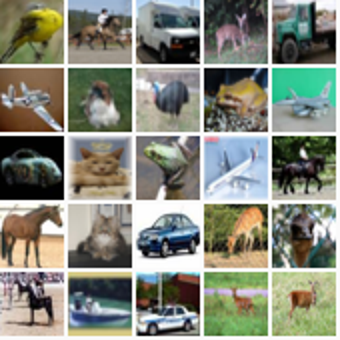

In [ ]:
# Show collage of 25 (randomly selected) images

# Every time you run this cell, you should see 25 different images. 
# That's fine (and desired, actually).

height_width = 32

def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_training[0]
print(idx)

6


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

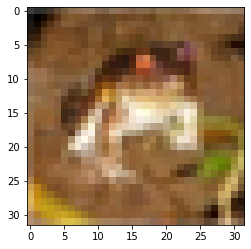

In [ ]:
plt.imshow(x_train[0])

### 2a. Baseline model

Let's start by using a convolutional neural network (CNN) built from scratch as a baseline.


#### Build and configure the model

In [ ]:
batch_size = 128
epochs = 40
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 15, 15, 64)      

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#### Train the model

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/40
391/391 [==============================] - 5s 12ms/step - loss: 1.9918 - accuracy: 0.2723 - val_loss: 1.7356 - val_accuracy: 0.3843
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 1.7020 - accuracy: 0.3856 - val_loss: 1.5771 - val_accuracy: 0.4349
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5880 - accuracy: 0.4239 - val_loss: 1.4823 - val_accuracy: 0.4694
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5027 - accuracy: 0.4542 - val_loss: 1.3978 - val_accuracy: 0.4950
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 1.4305 - accuracy: 0.4852 - val_loss: 1.3482 - val_accuracy: 0.5240
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 1.3659 - accuracy: 0.5107 - val_loss: 1.2847 - val_accuracy: 0.5434
Epoch 7/40
391/391 [==============================] - 4s 11ms/step - loss: 1.3122 - accuracy: 0.5302 - val_loss: 1.2403 - val_accuracy: 0.5567

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


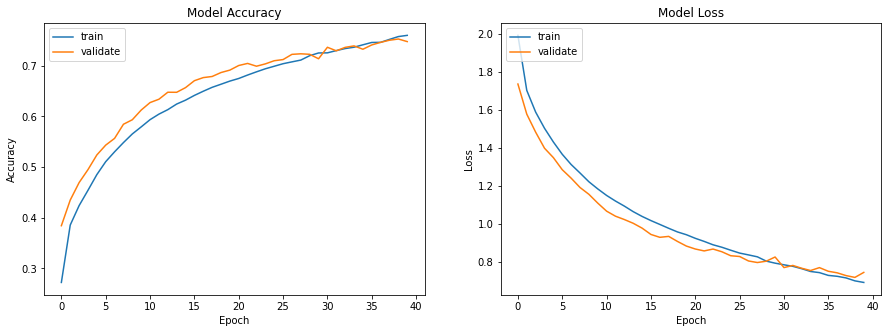

In [ ]:
plotmodelhistory(history)

#### Evaluate the model

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
baseline_loss=scores[0]
baseline_acc=scores[1]
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7443 - accuracy: 0.7478
Test loss: 0.7442908883094788
Test accuracy: 0.7477999925613403


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

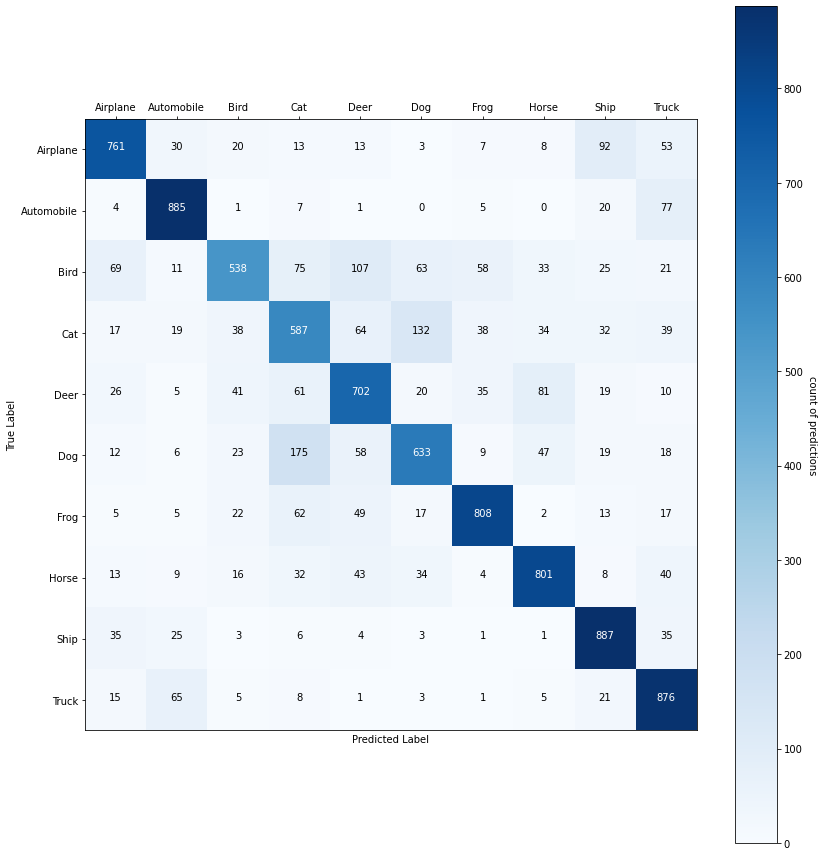

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1000
           1       0.83      0.89      0.86      1000
           2       0.76      0.54      0.63      1000
           3       0.57      0.59      0.58      1000
           4       0.67      0.70      0.69      1000
           5       0.70      0.63      0.66      1000
           6       0.84      0.81      0.82      1000
           7       0.79      0.80      0.80      1000
           8       0.78      0.89      0.83      1000
           9       0.74      0.88      0.80      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



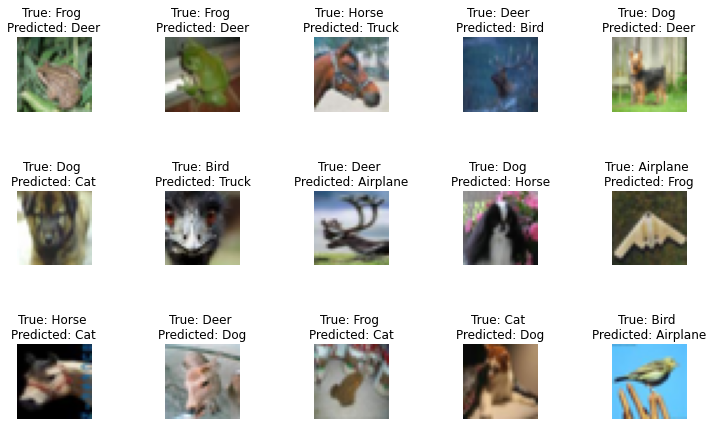

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


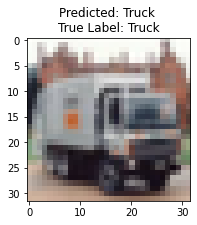

In [ ]:
show_test(11)

### 2b. Transfer Learning

Now we will see how we could use a [pretrained (on ImageNet) model](https://https://keras.io/api/applications/) to perform the same task (image classification) using a different dataset (CIFAR-10), using the *transfer learning* paradigm.

See:

https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning

https://keras.io/guides/transfer_learning/

#### Transfer Learning: setup

In [ ]:
from keras import Sequential
from keras.applications import VGG19,ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#### Attempt #1: using ResNet50 as a base model 

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50 

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_29 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 4000)              8196000   
_________________________________________________________________
dense_31 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_32 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_33 (Dense)             (None, 500)               500500    
______________________________________________________

In [ ]:
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 23s 83ms/step - loss: 1.5714 - accuracy: 0.4514 - val_loss: 1.1305 - val_accuracy: 0.6212
Epoch 2/10
274/274 [==============================] - 21s 78ms/step - loss: 0.8716 - accuracy: 0.6965 - val_loss: 0.9440 - val_accuracy: 0.6723
Epoch 3/10
274/274 [==============================] - 21s 78ms/step - loss: 0.5972 - accuracy: 0.7900 - val_loss: 0.8615 - val_accuracy: 0.7105
Epoch 4/10
274/274 [==============================] - 21s 77ms/step - loss: 0.4256 - accuracy: 0.8512 - val_loss: 0.8858 - val_accuracy: 0.7185
Epoch 5/10
274/274 [==============================] - 21s 78ms/step - loss: 0.2923 - accuracy: 0.9005 - val_loss: 0.8853 - val_accuracy: 0.7382
Epoch 6/10
274/274 [==============================] - 21s 78ms/step - loss: 0.1990 - accuracy: 0.9319 - val_loss: 0.9723 - val_accuracy: 0.7413
Epoch 7/10
274/274 [==============================] - 21s 78ms/step - loss: 0.1404 - accuracy: 0.9528 - val_loss: 1.0763 - val_accuracy:

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


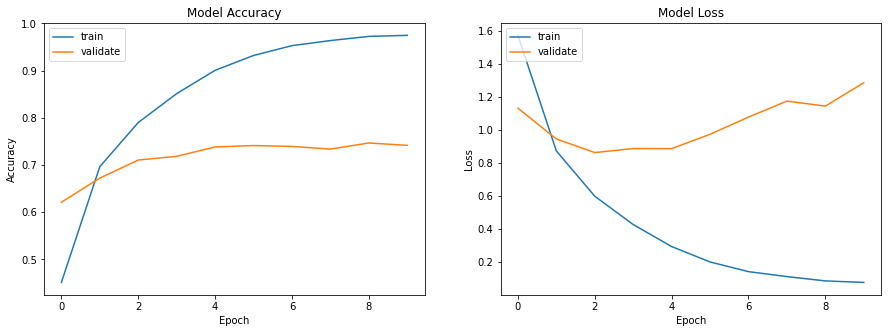

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
baseline_loss=scores[0]
baseline_acc=scores[1]
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3196 - accuracy: 0.7377
Test loss: 1.3196462392807007
Test accuracy: 0.7376999855041504


In [ ]:
  def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
y_pred=model_1.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

Confusion matrix, without normalization


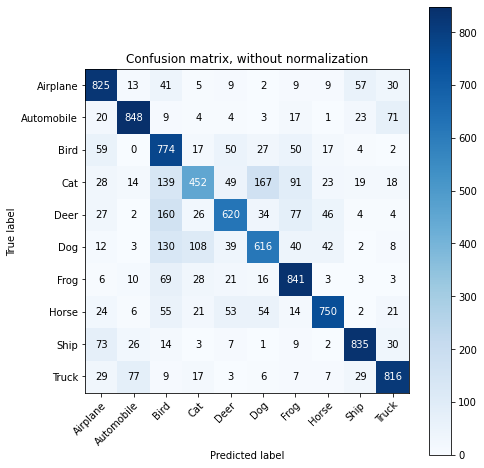

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


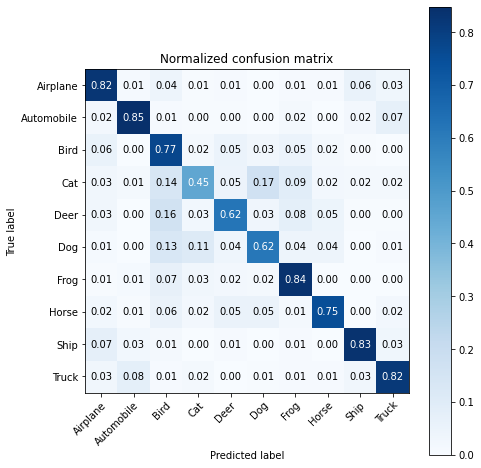

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

### 2.1 Your turn! (30 points)

1. Write code to build, train, and evaluate at least three additional transfer learning models and combinations of (hyper)parameters.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | Base model | Relevant (hyper)parameters | Test loss | Test accuracy | Remarks |
| --- | --- | --- | --- | --- | --- |
| Baseline  | ResNet50 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7526 | Baseline |
| Variation #1 | ... | ... | ... | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | ... | ... | Improved accuracy thanks to Y |
| Variation #3 | ... | ... | ... | ... | Improved accuracy thanks to Z |

3. Write a short paragraph summarizing what you have learned from this exercise. 









#**ANSWER 2.1**





#### Attempt #2: using Data Augmentation

As per https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/,
"Data augmentation involves making copies of the examples in the training dataset with small random modifications."

This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner."

Following https://keras.io/api/preprocessing/image/, I have used ImageDataGenerator class

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_30 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 4000)              8196000   
_________________________________________________________________
dense_36 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_38 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_39 (Dense)             (None, 10)              

In [ ]:
batch_size= 128
epochs=10
learn_rate=.001


sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# create data generator -- data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=batch_size)
# fit model
steps = int(x_train.shape[0] / batch_size)

In [ ]:
# Train the model


history_2 = model_1.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(x_val, y_val), verbose=1, shuffle=True)
 


Epoch 1/10
273/273 [==============================] - 27s 99ms/step - loss: 1.6274 - accuracy: 0.4254 - val_loss: 1.1488 - val_accuracy: 0.5989
Epoch 2/10
273/273 [==============================] - 26s 94ms/step - loss: 1.0236 - accuracy: 0.6430 - val_loss: 0.9344 - val_accuracy: 0.6772
Epoch 3/10
273/273 [==============================] - 26s 95ms/step - loss: 0.8506 - accuracy: 0.7011 - val_loss: 0.8225 - val_accuracy: 0.7157
Epoch 4/10
273/273 [==============================] - 26s 95ms/step - loss: 0.7434 - accuracy: 0.7408 - val_loss: 0.7451 - val_accuracy: 0.7448
Epoch 5/10
273/273 [==============================] - 26s 94ms/step - loss: 0.6735 - accuracy: 0.7649 - val_loss: 0.7182 - val_accuracy: 0.7546
Epoch 6/10
273/273 [==============================] - 26s 96ms/step - loss: 0.6146 - accuracy: 0.7830 - val_loss: 0.6789 - val_accuracy: 0.7633
Epoch 7/10
273/273 [==============================] - 26s 94ms/step - loss: 0.5690 - accuracy: 0.8014 - val_loss: 0.7135 - val_accuracy:

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


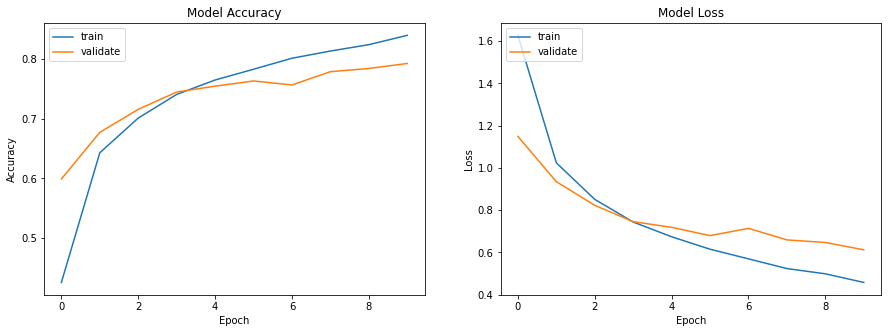

In [ ]:
plotmodelhistory(history_2)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
var2_loss=scores[0]
var2_acc=scores[1]
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6404 - accuracy: 0.7848
Test loss: 0.6404096484184265
Test accuracy: 0.7847999930381775


#Attempt #3: using batchsize=64 with Data augmentation

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)                                                    
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_31 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 4000)              8196000   
_________________________________________________________________
dense_41 (Dense)             (None, 2000)              8002000   
_________________________________________________________________
dense_42 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_43 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

In [ ]:
batch_size= 64
epochs=10
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=batch_size)
# fit model
steps = int(x_train.shape[0] / batch_size)

In [ ]:
# Train the model


history_3 = model_1.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(x_val, y_val), verbose=1, shuffle=True)
 


Epoch 1/10
546/546 [==============================] - 33s 60ms/step - loss: 1.4219 - accuracy: 0.4999 - val_loss: 0.9842 - val_accuracy: 0.6586
Epoch 2/10
546/546 [==============================] - 32s 59ms/step - loss: 0.9262 - accuracy: 0.6781 - val_loss: 0.7910 - val_accuracy: 0.7289
Epoch 3/10
546/546 [==============================] - 32s 59ms/step - loss: 0.7765 - accuracy: 0.7322 - val_loss: 0.7429 - val_accuracy: 0.7465
Epoch 4/10
546/546 [==============================] - 32s 59ms/step - loss: 0.6853 - accuracy: 0.7627 - val_loss: 0.6987 - val_accuracy: 0.7605
Epoch 5/10
546/546 [==============================] - 32s 59ms/step - loss: 0.6138 - accuracy: 0.7877 - val_loss: 0.6508 - val_accuracy: 0.7795
Epoch 6/10
546/546 [==============================] - 32s 59ms/step - loss: 0.5750 - accuracy: 0.8006 - val_loss: 0.6084 - val_accuracy: 0.7956
Epoch 7/10
546/546 [==============================] - 32s 59ms/step - loss: 0.5203 - accuracy: 0.8184 - val_loss: 0.7194 - val_accuracy:

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


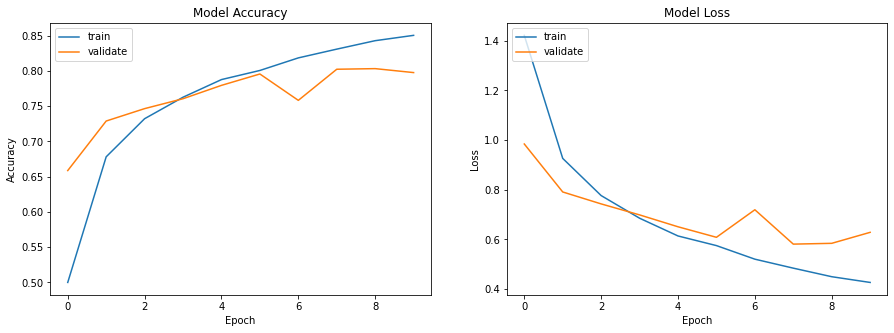

In [ ]:
plotmodelhistory(history_3)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
var3_loss=scores[0]
var3_acc=scores[1]
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6581 - accuracy: 0.7877
Test loss: 0.6580511927604675
Test accuracy: 0.7876999974250793


#Attempt #4 using batch_size=64, Data augmentation and learning rate=0.0001

In [ ]:
batch_size= 64
epochs=10
learn_rate=.0001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=batch_size)
# fit model
steps = int(x_train.shape[0] / batch_size)

In [ ]:
# Train the model


history_4 = model_1.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(x_val, y_val), verbose=1, shuffle=True)
 


Epoch 1/10
546/546 [==============================] - 33s 61ms/step - loss: 0.3596 - accuracy: 0.8745 - val_loss: 0.5202 - val_accuracy: 0.8287
Epoch 2/10
546/546 [==============================] - 32s 59ms/step - loss: 0.3412 - accuracy: 0.8813 - val_loss: 0.5230 - val_accuracy: 0.8284
Epoch 3/10
546/546 [==============================] - 32s 59ms/step - loss: 0.3276 - accuracy: 0.8869 - val_loss: 0.5266 - val_accuracy: 0.8297
Epoch 4/10
546/546 [==============================] - 32s 59ms/step - loss: 0.3224 - accuracy: 0.8876 - val_loss: 0.5273 - val_accuracy: 0.8295
Epoch 5/10
546/546 [==============================] - 32s 59ms/step - loss: 0.3160 - accuracy: 0.8893 - val_loss: 0.5152 - val_accuracy: 0.8311
Epoch 6/10
546/546 [==============================] - 32s 58ms/step - loss: 0.3082 - accuracy: 0.8926 - val_loss: 0.5161 - val_accuracy: 0.8325
Epoch 7/10
546/546 [==============================] - 32s 58ms/step - loss: 0.3067 - accuracy: 0.8923 - val_loss: 0.5263 - val_accuracy:

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_4.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


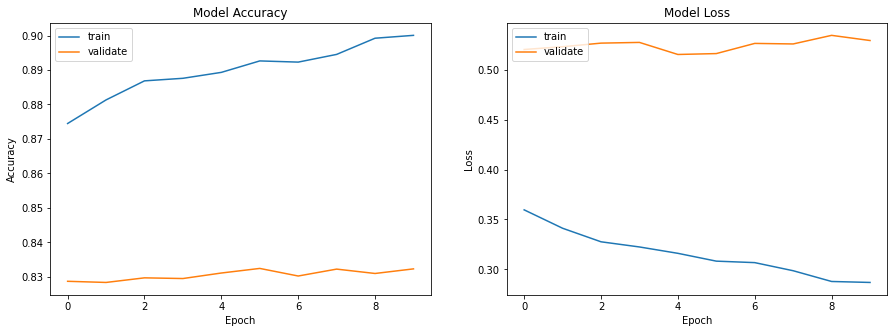

In [ ]:
plotmodelhistory(history_4)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
var4_loss=scores[0]
var4_acc=scores[1]
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.5537 - accuracy: 0.8276
Test loss: 0.5536547303199768
Test accuracy: 0.8276000022888184


In [ ]:
import pandas as pd
# var#1 - baseline
# var#2 - modify baseline by using Data Augmentation 
# var#3 - modify baseline by using Data Augmentation + batch size 64
# var#4 - modify baseline by using Data Augmentation + batch size 64 +;earn rate=0.0001

def summarize():
    data = {'Method' : ['Baseline','Variation #1', 'Variation #2', 'Variation #3'],
            'Base Model' : ['ResNet50', 'ResNet50', 'ResNet50', 'ResNet50'],
            'Relevant (hyper)parameters' : ['SGD,batch_size=128,epochs=10,learn_rate=.001', 'SGD, batch_size=128,epochs=10,learn_rate=.001', 'SGD, batch_size=64,epochs=10,learn_rate=.001','SGD, batch_size=64,epochs=10,learn_rate=.0001'],
            'Test loss': [baseline_loss,var2_loss,var3_loss, var4_loss],
            'Test accuracy': [baseline_acc,var2_acc,var3_acc, var4_acc],
            'Remarks' : ['Baseline','Data Augmentation improved improved the accuracy but it was overfitting','Batch size and data augmentation improved accuracy and improved overfitting ','Change in learning rate improved accuracy but caused overfitting']
           }
    df = pd.DataFrame(data, columns= ['Method','Base Model','Relevant (hyper)parameters','Test loss','Test accuracy', 'Remarks'])
    
    display(df)

summarize()

,Method,Base Model,Relevant (hyper)parameters,Test loss,Test accuracy,Remarks
0,Baseline,ResNet50,"SGD,batch_size=128,epochs=10,learn_rate=.001",1.319646,0.7377,Baseline
1,Variation #1,ResNet50,"SGD, batch_size=128,epochs=10,learn_rate=.001",0.640410,0.7848,Data Augmentation improved improved the accura...
2,Variation #2,ResNet50,"SGD, batch_size=64,epochs=10,learn_rate=.001",0.658051,0.7877,Batch size and data augmentation improved accu...
3,Variation #3,ResNet50,"SGD, batch_size=64,epochs=10,learn_rate=.0001",0.553655,0.8276,Change in learning rate improved accuracy but ...


#Summarize 2.1

Data augmentation improved the accuracy of the model because the images of the animals had so much in common that modifying one image so that it looks different enough to be classified correctly. For example, both dog and cat have eyes, ears, tail, fur and a pouty mouth, but focusing on say whiskers for cat improved  the chances of identifying cats correctly.

Batch size and learning rate also helped in improving the results. It is believed that smaller batch sizes lead to more optimal results. It also helped in preventing the overfitting which resulted due to data augmentation. Smaller learning rate improved accuracy but increased the time for training.

### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

# My Conclusion

**What have you learned from this assignment?**

I learned how to create different deep learning models by playing around with parameters, optimizers, base models, dropout layers and data augmentation. I came across new terms for which I had to do extra reading to understand.

**Which parts were the most fun, time-consuming, enlightening, tedious?**

The most fun part was improving the accuracy of the model - it was a dejavu moment. This was also time consuming as it was difficult to figure out what should be modified to improve the performance of a model. The tedious part was to stay organized to present clear results.

**What would you do if you had an additional week to work on this?**

Create more and more models. Play around with as many parameters and try to find a trend of accuracy for each parameter.